### Preparando o ambiente

In [20]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# direciona para o caminho desejado
%cd /content/drive/MyDrive/PRETALAB/Estatística/Aula03

/content/drive/MyDrive/PRETALAB/Estatística/Aula03


In [22]:
#Este módulo fornece uma maneira simples de usar funcionalidades que são dependentes de sistema operacional
import os

# os.getcwd() retorna o caminho absoluto do diretório de trabalho atual
print(os.getcwd())

/content/drive/MyDrive/PRETALAB/Estatística/Aula03


In [23]:
# Mostra o conteudo do local/pasta
!ls

'aula3 - Estatística.ipynb'


# Prática - Exercícos de Estátistica e Testes de Hipóteses

### Objetivos

Explorar:

1. Probabilidade: Avaliar a probabilidade de eventos relacionados ao comportamento do cliente.

2. Amostragem: Utilizar técnicas de amostragem para extrair dados representativos.

3. Testes de Hipóteses: Realizar testes estatísticos para entender se as mudanças propostas têm um impacto significativo.

### Cenário

Vamos analisar os dados de um e-commerce para entender melhor o comportamento dos clientes durante a jornada de compra. Os dados incluem informações sobre o tempo gasto em diferentes etapas da compra, o dispositivo utilizado (Desktop ou Mobile), e o tipo de cliente (Novo, Recorrente, VIP).

O objetivo é identificar oportunidades para melhorar a experiência do usuário.


  ***Queremos entender:***

1. Se o tempo de pesquisa é significativamente diferente entre tipos de clientes.

2. Se existe uma relação entre o tipo de cliente e o dispositivo usado.

3. Se há diferenças significativas no tempo de checkout entre clientes novos, recorrentes e VIPs.

4. A probabilidade de um cliente VIP realizar uma compra em um dado período.

5. Como a amostragem afeta a precisão das conclusões.

### Passo 1: Gerando Dados Fictícios

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Gerando dados fictícios
np.random.seed(42)  # Para reprodutibilidade

In [26]:
# Dados dos clientes (tipos de clientes)
num_clientes = 5000
tipos_clientes = np.random.choice(['Novo', 'Recorrente', 'VIP'], size=num_clientes, p=[0.6, 0.3, 0.1])
dispositivos = np.random.choice(['Desktop', 'Mobile'], size=num_clientes, p=[0.5, 0.5])

In [27]:
# Tempo gasto em cada etapa da jornada de compra (em minutos)
tempo_pesquisa = np.random.normal(loc=20, scale=5, size=num_clientes) # média 20 minutos
tempo_visualizacao = np.random.normal(loc=10, scale=3, size=num_clientes) # média 10 minutos
tempo_carrinho = np.random.normal(loc=5, scale=2, size=num_clientes) # média 5 minutos
tempo_checkout = np.random.normal(loc=3, scale=1, size=num_clientes) # média 3 minutos

In [28]:
# Criando o DataFrame
dados = pd.DataFrame({
    'Tipo_Cliente': tipos_clientes,
    'Dispositivo': dispositivos,
    'Tempo_Pesquisa': tempo_pesquisa,
    'Tempo_Visualizacao': tempo_visualizacao,
    'Tempo_Carrinho': tempo_carrinho,
    'Tempo_Checkout': tempo_checkout
})

In [29]:
# Exibindo as primeiras linhas do DataFrame
print(dados.head())

  Tipo_Cliente Dispositivo  Tempo_Pesquisa  Tempo_Visualizacao  \
0         Novo     Desktop       12.560691            8.044144   
1          VIP     Desktop       14.374069            9.699916   
2   Recorrente      Mobile       21.944095           14.440549   
3         Novo     Desktop       14.130633           11.526290   
4         Novo      Mobile       25.563172            5.115238   

   Tempo_Carrinho  Tempo_Checkout  
0        3.767704        3.383196  
1        4.214651        3.758389  
2        2.936347        2.117232  
3        3.221496        1.122275  
4        5.868754        2.125035  


In [30]:
# Exibindo as informações do DataFrame
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo_Cliente        5000 non-null   object 
 1   Dispositivo         5000 non-null   object 
 2   Tempo_Pesquisa      5000 non-null   float64
 3   Tempo_Visualizacao  5000 non-null   float64
 4   Tempo_Carrinho      5000 non-null   float64
 5   Tempo_Checkout      5000 non-null   float64
dtypes: float64(4), object(2)
memory usage: 234.5+ KB


### Passo 2: Análise Descritiva


Vamos realizar uma análise descritiva dos dados para entender melhor a distribuição do tempo gasto em cada etapa.

In [31]:
# Análise descritiva
#print(dados.groupby('Tempo_Pesquisa').agg(['mean', 'std', 'min', 'max']))

In [32]:
# Análise descritiva, selecionando apenas colunas numéricas
print(dados.groupby('Tempo_Pesquisa')
      [['Tempo_Visualizacao', 'Tempo_Carrinho', 'Tempo_Checkout']].agg
       (['mean', 'std', 'min', 'max']))

               Tempo_Visualizacao                           Tempo_Carrinho  \
                             mean std        min        max           mean   
Tempo_Pesquisa                                                               
0.387999                 8.796480 NaN   8.796480   8.796480       2.651791   
0.816722                10.500903 NaN  10.500903  10.500903       6.966357   
3.122104                 9.989568 NaN   9.989568   9.989568       7.418559   
3.394427                 8.704746 NaN   8.704746   8.704746       5.147278   
3.792431                10.735831 NaN  10.735831  10.735831       3.699052   
...                           ...  ..        ...        ...            ...   
35.788856               11.686277 NaN  11.686277  11.686277       3.168065   
36.420591               10.449617 NaN  10.449617  10.449617       4.913920   
36.438806                7.570718 NaN   7.570718   7.570718       4.706963   
36.886915               13.881259 NaN  13.881259  13.881259     

In [33]:
# Análise Descritiva com método describe()
print(dados.describe())

       Tempo_Pesquisa  Tempo_Visualizacao  Tempo_Carrinho  Tempo_Checkout
count     5000.000000         5000.000000     5000.000000     5000.000000
mean        19.988477           10.081046        4.992606        3.000117
std          4.928110            3.040848        2.000506        0.980982
min          0.387999           -0.905601       -2.712751       -0.495045
25%         16.730005            8.014746        3.613512        2.316627
50%         19.980941           10.099359        4.985909        3.008361
75%         23.253711           12.147736        6.376956        3.661557
max         36.888841           23.437253       12.884662        6.215374


In [34]:
# Análise Descritiva com método describe() da coluna 'Tempo_Carrinho'
dados['Tempo_Carrinho'].describe()

,Tempo_Carrinho
count,5000.000000
mean,4.992606
std,2.000506
min,-2.712751
25%,3.613512
50%,4.985909
75%,6.376956
max,12.884662


### Passo 3:  Probabilidade

In [35]:
# Probabilidade de um cliente VIP realizar uma compra em um dado período
num_vips = len(dados[dados['Tipo_Cliente'] == 'VIP'])

In [36]:
num_clientes = len(dados)

In [37]:
probabilidade_vip = num_vips / num_clientes

In [38]:
print(f"Probabilidade de um cliente ser VIP: {probabilidade_vip:.2%}")

Probabilidade de um cliente ser VIP: 9.58%


### Passo 4: Amostragem

In [40]:
# Extraindo uma amostra aleatória de 500 clientes para análise
amostra = dados.sample(n=500, random_state=42)


In [41]:
print(f"Amostra de 500 clientes:\n{amostra.head()}")

Amostra de 500 clientes:
     Tipo_Cliente Dispositivo  Tempo_Pesquisa  Tempo_Visualizacao  \
1501         Novo     Desktop       18.033244            6.109262   
2586         Novo     Desktop       18.788123            5.366136   
2653         Novo      Mobile       12.689448            9.131530   
1055         Novo     Desktop       25.253871           10.759551   
705           VIP     Desktop       25.688884           12.387061   

      Tempo_Carrinho  Tempo_Checkout  
1501        4.702057        4.504113  
2586        4.497438        2.519047  
2653        5.360570        3.453580  
1055        4.143157        3.311208  
705         4.541820        3.972052  


### Passo 5: Teste de Hipóteses - Teste T para Diferença de Médias

Testando se o tempo médio de pesquisa é diferente entre clientes "Novos" e "Recorrentes"

In [42]:
from scipy.stats import ttest_ind

In [43]:
tempo_pesquisa_novos = dados[dados['Tipo_Cliente'] == 'Novo']['Tempo_Pesquisa']
tempo_pesquisa_recorrentes = dados[dados['Tipo_Cliente'] == 'Recorrente']['Tempo_Pesquisa']

In [52]:
tempo_pesquisa_novos.mean()

20.179587813692628

In [53]:
tempo_pesquisa_recorrentes.mean()

19.710917279001183

In [45]:
# Aplicando o teste T
t_stat, p_value = ttest_ind(tempo_pesquisa_novos, tempo_pesquisa_recorrentes)

In [47]:
print(f"Teste T para Tempo de Pesquisa (Novos vs Recorrentes):")
print(f"Estatística T: {t_stat:.4f}, Valor-p: {p_value:.4f}")

Teste T para Tempo de Pesquisa (Novos vs Recorrentes):
Estatística T: 3.0205, Valor-p: 0.0025


Recusamos a Hipótese Nula!  

### Passo 6: Teste Qui-Quadrado para Associação entre Variáveis Categóricas

Existe relação entre o tipo do cliente e o dispositivo que ele usa?

In [48]:
contingencia = pd.crosstab(dados['Tipo_Cliente'], dados['Dispositivo'])

In [54]:
contingencia

Dispositivo,Desktop,Mobile
Tipo_Cliente,,
Novo,1554,1445
Recorrente,774,748
VIP,248,231


In [49]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingencia)

In [50]:
print(f"Teste Qui-Quadrado entre Tipo de Cliente e Dispositivo:")


Teste Qui-Quadrado entre Tipo de Cliente e Dispositivo:


In [51]:
print(f"Estatística Qui-Quadrado: {chi2_stat:.4f}, Valor-p: {p_value:.4f}")


Estatística Qui-Quadrado: 0.3887, Valor-p: 0.8234


Rejeitamos a hipótese nula, não existe nenhuma relação entre o dispositivo usado e o tipo do cliente.

### Passo 7: ANOVA para Comparar o Tempo Médio de Checkout entre os Grupos

Tempo médio de checkout entre os três grupos de clientes. (mais de duas amostras) (o teste T só pode ser usado quando compara a diferença entre apenas duas amostras)

In [55]:
grupo_novo = dados[dados['Tipo_Cliente'] == 'Novo']['Tempo_Checkout']

In [56]:
grupo_recorrente = dados[dados['Tipo_Cliente'] == 'Recorrente']['Tempo_Checkout']

In [57]:
grupo_vip = dados[dados['Tipo_Cliente'] == 'VIP']['Tempo_Checkout']


In [58]:
f_stat, p_value = f_oneway(grupo_novo, grupo_recorrente, grupo_vip)


In [59]:
print(f"ANOVA para Tempo de Checkout (Novos, Recorrentes, VIP):")
print(f"Estatística F: {f_stat:.4f}, Valor-p: {p_value:.4f}")

ANOVA para Tempo de Checkout (Novos, Recorrentes, VIP):
Estatística F: 0.9533, Valor-p: 0.3855


### Passo 7: Visualizações

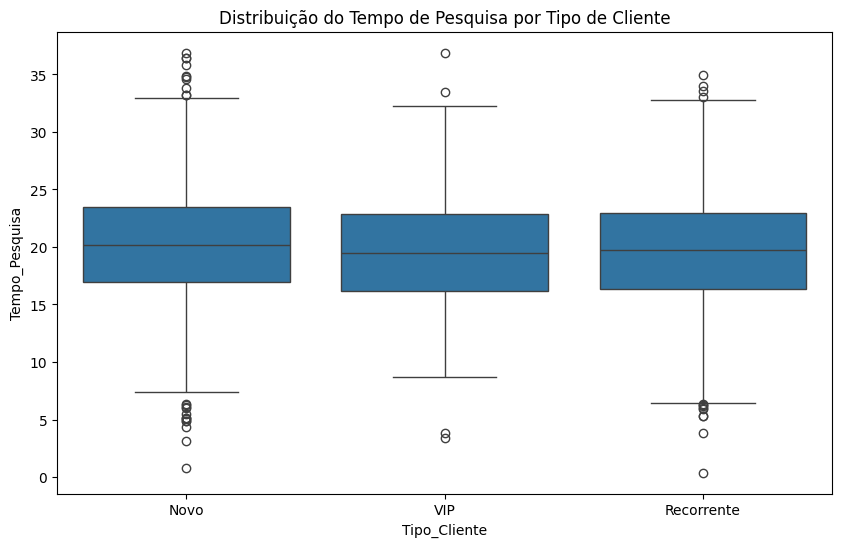

In [60]:
# Distribuição do Tempo de Pesquisa por Tipo de Cliente
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo_Cliente', y='Tempo_Pesquisa', data=dados)
plt.title('Distribuição do Tempo de Pesquisa por Tipo de Cliente')
plt.show()

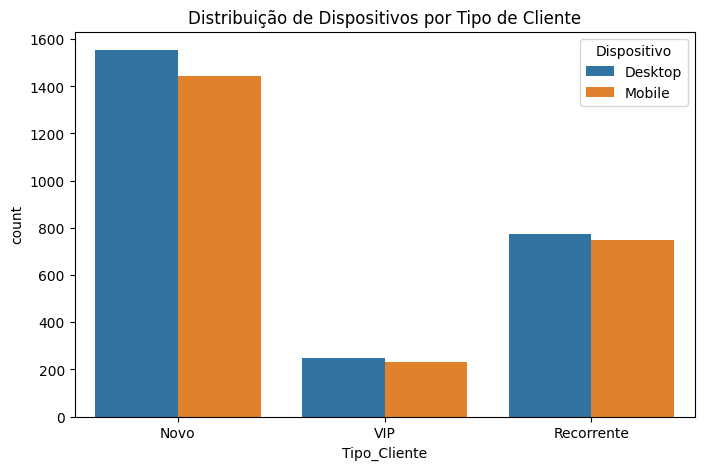

In [61]:
# Gráfico de Barras para Associação entre Tipo de Cliente e Dispositivo
plt.figure(figsize=(8, 5))
sns.countplot(x='Tipo_Cliente', hue='Dispositivo', data=dados)
plt.title('Distribuição de Dispositivos por Tipo de Cliente')
plt.show()

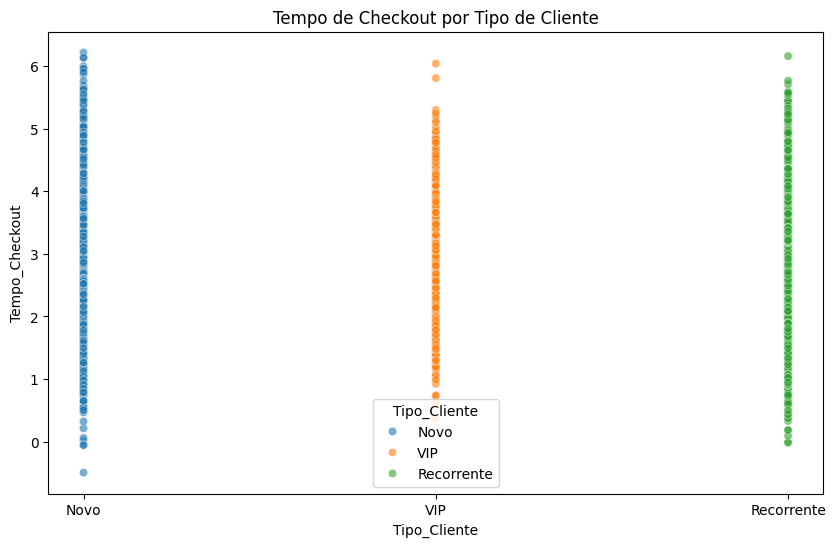

In [62]:
# Gráfico de Dispersão para Tempo de Checkout por Tipo de Cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tipo_Cliente', y='Tempo_Checkout', data=dados, hue='Tipo_Cliente', alpha=0.6)
plt.title('Tempo de Checkout por Tipo de Cliente')
plt.show()